In [31]:
from utils.download_kaggle_dataset import download_kaggle_competition
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
data = download_kaggle_competition("store-sales-time-series-forecasting")
print(data)

Unzipping files...
Competition data downloaded to: datasets
datasets


In [33]:
train_df = pd.read_csv(f"{data}/train.csv")
test_df = pd.read_csv(f"{data}/test.csv")
submission_df = pd.read_csv(f"{data}/sample_submission.csv")
holidays_df = pd.read_csv(f"{data}/holidays_events.csv")
oil_df = pd.read_csv(f"{data}/oil.csv")
stores_df = pd.read_csv(f"{data}/stores.csv")
transactions_df = pd.read_csv(f"{data}/transactions.csv")

train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
holidays_df['date'] = pd.to_datetime(holidays_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])
transactions_df['date'] = pd.to_datetime(transactions_df['date'])


In [34]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

display(train_df.head())
display(train_df.describe())
train_df.info()


Train shape: (3000888, 6)
Test shape: (28512, 5)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [35]:
print(f"Train date range: {train_df['date'].min()} → {train_df['date'].max()}")
print(f"Test date range:  {test_df['date'].min()} → {test_df['date'].max()}")


Train date range: 2013-01-01 00:00:00 → 2017-08-15 00:00:00
Test date range:  2017-08-16 00:00:00 → 2017-08-31 00:00:00


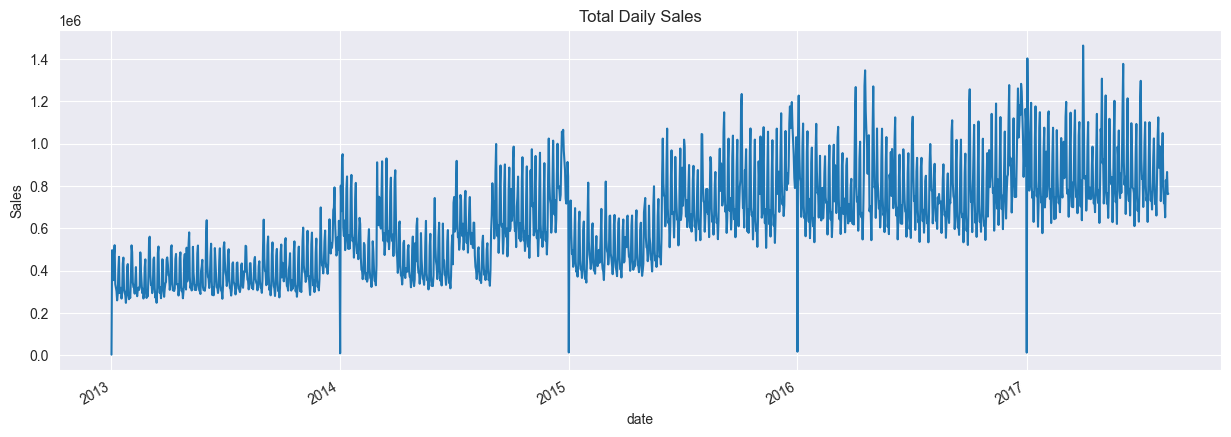

In [37]:
daily_sales = train_df.groupby('date')['sales'].sum()
daily_sales.plot(figsize=(15, 5), title="Total Daily Sales")
plt.ylabel("Sales")
plt.show()


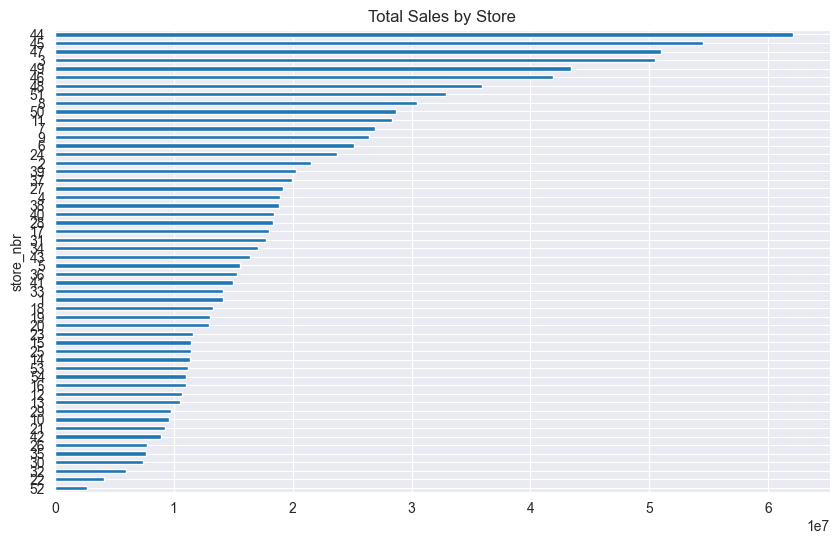

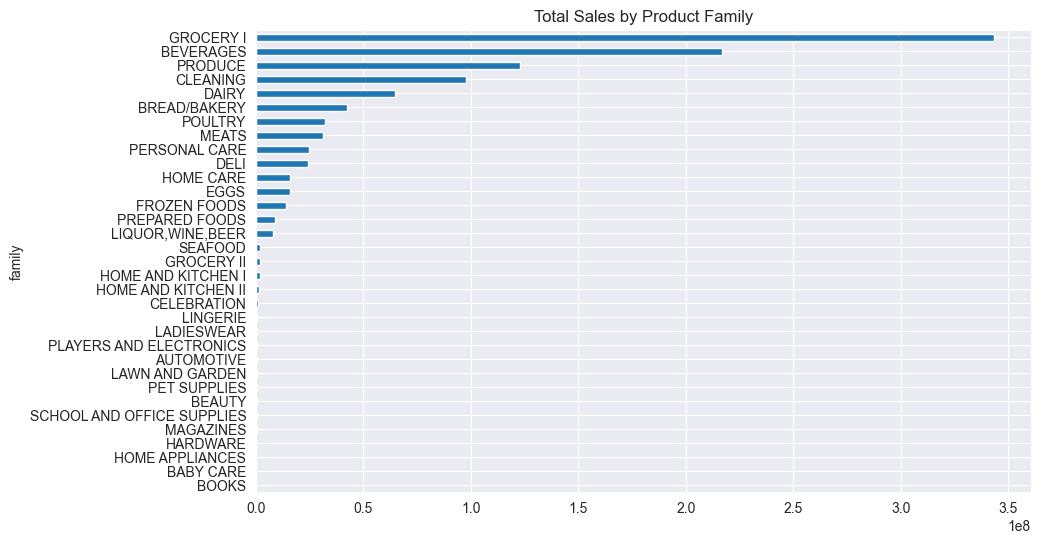

In [39]:
store_sales = train_df.groupby('store_nbr')['sales'].sum().sort_values()
store_sales.plot(kind='barh', figsize=(10, 6), title="Total Sales by Store")
plt.show()

family_sales = train_df.groupby('family')['sales'].sum().sort_values()
family_sales.plot(kind='barh', figsize=(10, 6), title="Total Sales by Product Family")
plt.show()


<Axes: title={'center': 'Total Sales by Product Family'}, ylabel='family'>

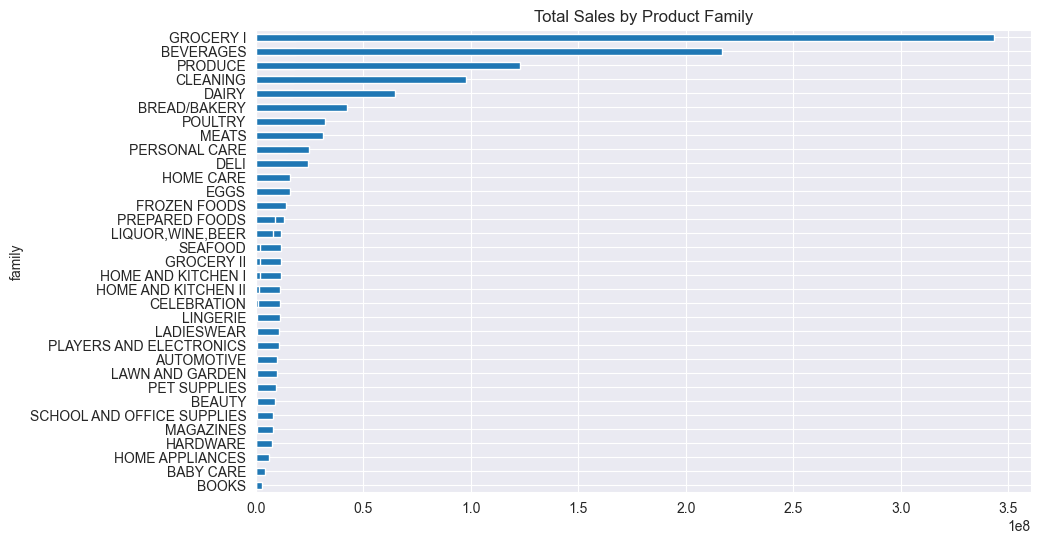

In [22]:
train_df.groupby('store_nbr')['sales'].sum().sort_values().plot(kind='barh', figsize=(10, 6), title="Total Sales by Store")
train_df.groupby('family')['sales'].sum().sort_values().plot(kind='barh', figsize=(10, 6), title="Total Sales by Product Family")


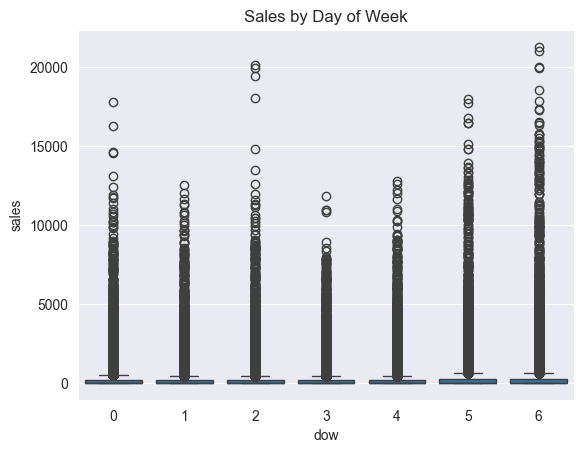

In [40]:
train_df['day'] = train_df['date'].dt.day
train_df['month'] = train_df['date'].dt.month
train_df['year'] = train_df['date'].dt.year
train_df['dow'] = train_df['date'].dt.dayofweek  

sns.boxplot(x='dow', y='sales', data=train_df.sample(100_000))
plt.title("Sales by Day of Week")
plt.show()

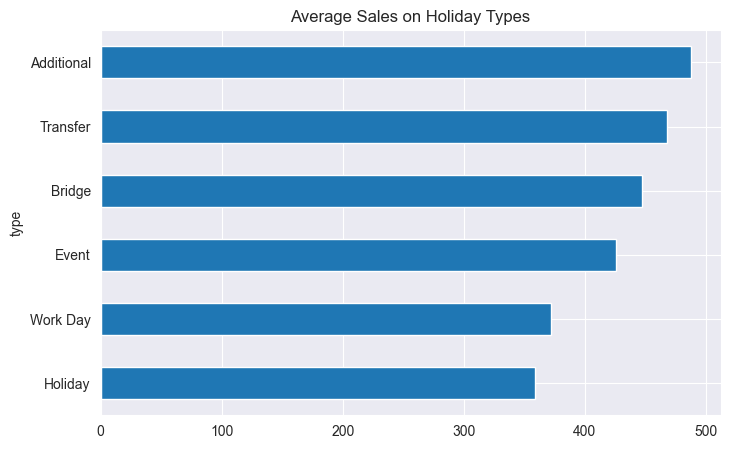

In [41]:
df_holidays = train_df.merge(holidays_df[['date', 'type']], on='date', how='left')

df_holidays[df_holidays['type'].notnull()].groupby('type')['sales'].mean().sort_values().plot(
    kind='barh', figsize=(8, 5), title="Average Sales on Holiday Types"
)
plt.show()


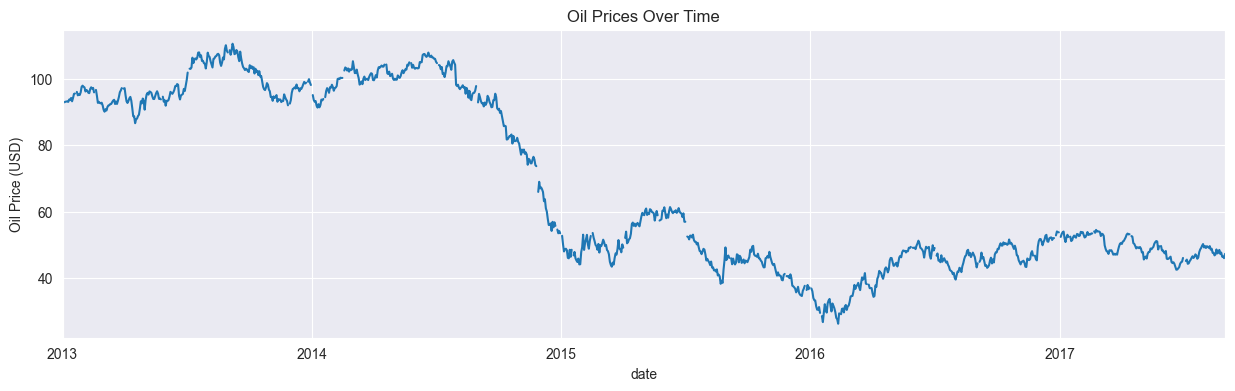

In [42]:
oil_df.set_index('date')['dcoilwtico'].plot(figsize=(15, 4), title='Oil Prices Over Time')
plt.ylabel('Oil Price (USD)')
plt.show()


Sales vs Transactions Correlation: 0.21481484042443397


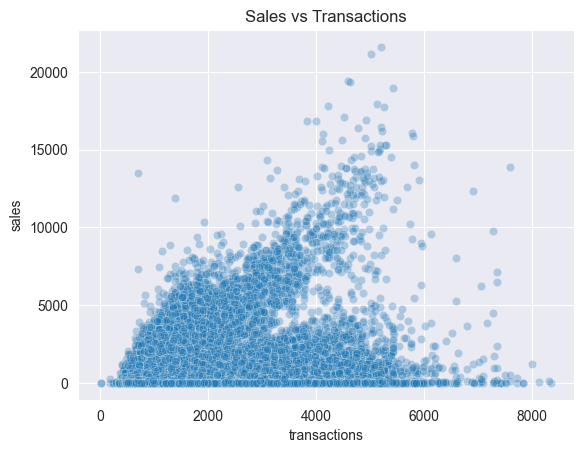

In [43]:
tx_merged = train_df.merge(transactions_df, on=['date', 'store_nbr'], how='left')

print("Sales vs Transactions Correlation:", tx_merged[['sales', 'transactions']].corr().iloc[0,1])

sns.scatterplot(x='transactions', y='sales', data=tx_merged.sample(100_000), alpha=0.3)
plt.title("Sales vs Transactions")
plt.show()


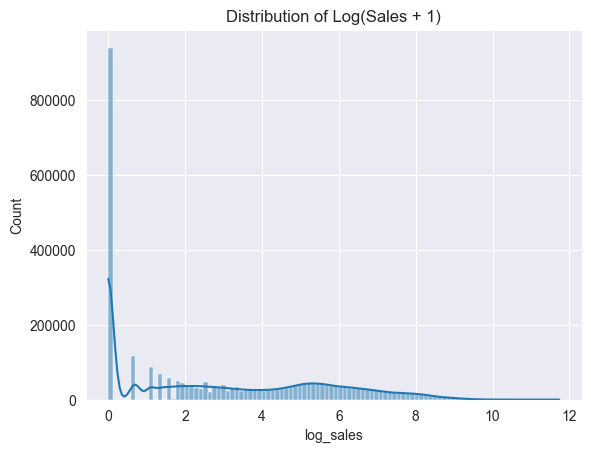

In [44]:
train_df['log_sales'] = np.log1p(train_df['sales'])

sns.histplot(train_df['log_sales'], bins=100, kde=True)
plt.title("Distribution of Log(Sales + 1)")
plt.show()